In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## IMPORTING DATASET

In [2]:
df = pd.read_csv('Manhattan12.csv')

In [3]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         27395 non-null  int64 
 1   NEIGHBORHOOD                    27395 non-null  object
 2   BUILDING CLASS CATEGORY         27395 non-null  object
 3   TAX CLASS AT PRESENT            27395 non-null  object
 4   BLOCK                           27395 non-null  int64 
 5   LOT                             27395 non-null  int64 
 6   EASE-MENT                       27395 non-null  object
 7   BUILDING CLASS AT PRESENT       27395 non-null  object
 8   ADDRESS                         27395 non-null  object
 9   APART
MENT
NUMBER               27395 non-null  object
 10  ZIP CODE                        27395 non-null  int64 
 11  RESIDENTIAL UNITS               27395 non-null  object
 12  COMMERCIAL UNITS                27395 non-null

#### SHAPE OF DATA

In [5]:
df.shape

(27395, 21)

In [6]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APART\nMENT\nNUMBER               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE\nPRICE                       0
SALE DATE                         0
dtype: int64

### RENAMING INCORRECTED FORMAT COLUMNS

In [7]:
df['APART\nMENT\nNUMBER'].unique()

array(['            ', '1A          ', '-           ', ..., '106', '204',
       '506'], dtype=object)

In [8]:
df = df.rename(columns={'APART\nMENT\nNUMBER': 'APARTMENT NUMBER'})

In [9]:
df = df.rename(columns = {'SALE\nPRICE': 'SALE PRICE'})

In [10]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


### Creating list of categorical variables and numerical variabels

In [11]:
categorical_variables = []
numerical_variables = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_variables.append(column)
    else:
        numerical_variables.append(column)

print(f"Categorical Variables : {categorical_variables}")
print(f"Numerical variables : {numerical_variables}")

Categorical Variables : ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']
Numerical variables : ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'COMMERCIAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']


### Converting SALE DATE to datetime

In [12]:
def custom_date_parser(date_str):
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y')
    except (ValueError, TypeError):
        return pd.NaT 


df['SALE DATE'] = df['SALE DATE'].apply(custom_date_parser)

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",2013-05-20
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",2013-05-16
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",2013-05-23
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",2013-05-15
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",2013-05-13


### DROPING THE COLUMNS

In [13]:
df2 = df.drop(['BOROUGH','EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'], axis = 1)

In [14]:
df2.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,,13 CONDOS - ELEVATOR APARTMENTS,738,1306,10014,0,0,0,0,0,0,2,"$2,214,693",2013-05-20
1,,13 CONDOS - ELEVATOR APARTMENTS,738,1307,10014,0,0,0,0,0,0,2,"$1,654,656",2013-05-16
2,,13 CONDOS - ELEVATOR APARTMENTS,738,1308,10014,0,0,0,0,0,0,2,"$1,069,162",2013-05-23
3,,13 CONDOS - ELEVATOR APARTMENTS,738,1309,10014,0,0,0,0,0,0,2,"$1,374,637",2013-05-15
4,,13 CONDOS - ELEVATOR APARTMENTS,738,1310,10014,0,0,0,0,0,0,2,"$1,649,565",2013-05-13


In [15]:
df2.shape

(27395, 14)

## DATA EXPLORATION

### Visualizing the price across the neighborhoods

In [16]:
df3 = pd.get_dummies(df2, columns = ['NEIGHBORHOOD'], prefix = ['NEIGHBOURHOOD CLASS'])

In [17]:
df3.head()

,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,...,NEIGHBOURHOOD CLASS_SOUTHBRIDGE,NEIGHBOURHOOD CLASS_TRIBECA,NEIGHBOURHOOD CLASS_UPPER EAST SIDE (59-79),NEIGHBOURHOOD CLASS_UPPER EAST SIDE (79-96),NEIGHBOURHOOD CLASS_UPPER EAST SIDE (96-110),NEIGHBOURHOOD CLASS_UPPER WEST SIDE (59-79),NEIGHBOURHOOD CLASS_UPPER WEST SIDE (79-96),NEIGHBOURHOOD CLASS_UPPER WEST SIDE (96-116),NEIGHBOURHOOD CLASS_WASHINGTON HEIGHTS LOWER,NEIGHBOURHOOD CLASS_WASHINGTON HEIGHTS UPPER
0,13 CONDOS - ELEVATOR APARTMENTS,738,1306,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,13 CONDOS - ELEVATOR APARTMENTS,738,1307,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,13 CONDOS - ELEVATOR APARTMENTS,738,1308,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,13 CONDOS - ELEVATOR APARTMENTS,738,1309,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,13 CONDOS - ELEVATOR APARTMENTS,738,1310,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


### Removing "$" sign from "SALE PRICE" and converting string to int data type

In [18]:
import re 

def clean_and_convert_price(price):
    try:
        cleaned_price = int(re.sub(r'\D', '', price))
        return cleaned_price
    except (ValueError, TypeError):
        return None

df2['SALE PRICE'] = df2['SALE PRICE'].apply(clean_and_convert_price)

In [19]:
neighborhood_prices = df2.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()

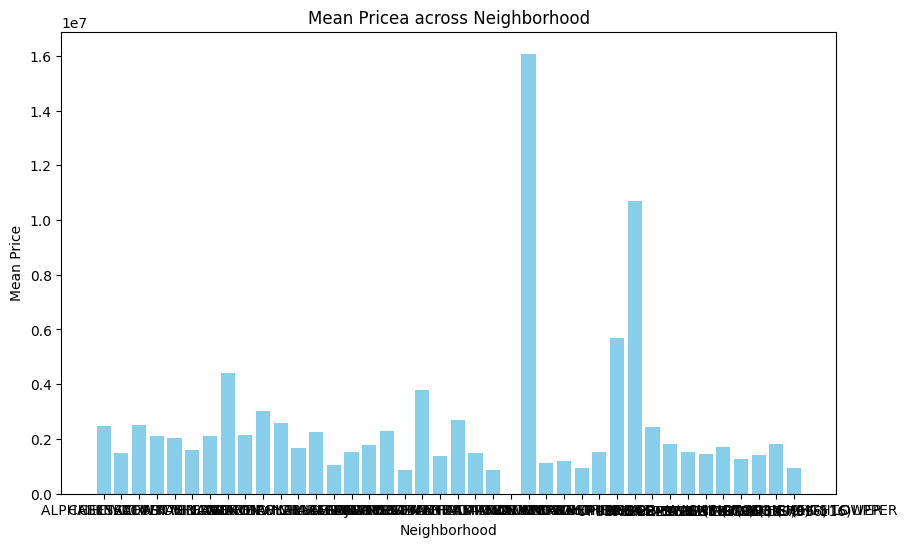

In [20]:
neighborhood = neighborhood_prices['NEIGHBORHOOD']
mean_prices = neighborhood_prices['SALE PRICE']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(neighborhood, mean_prices, color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.title('Mean Pricea across Neighborhood')
plt.show()

## Visualizing the price over time

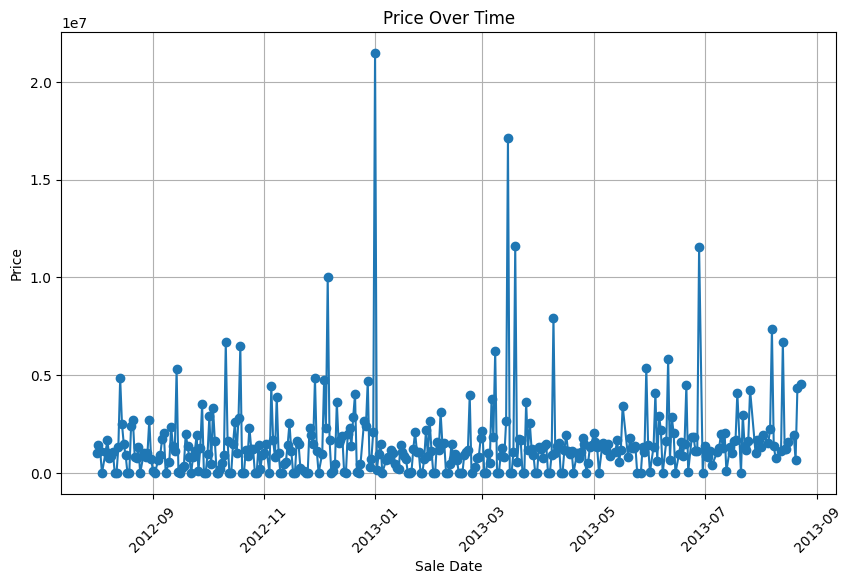

In [21]:
sale_date_price = df2.groupby('SALE DATE')['SALE PRICE'].mean().reset_index()
mean_prices = sale_date_price['SALE DATE']

plt.figure(figsize=(10, 6))
plt.plot(mean_prices, sale_date_price['SALE PRICE'], marker='o', linestyle='-')
plt.xlabel('Sale Date')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.grid(True)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

## MODEL BUILDING

### Splitting Training & Testing data

In [22]:
df3.head()

,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,...,NEIGHBOURHOOD CLASS_SOUTHBRIDGE,NEIGHBOURHOOD CLASS_TRIBECA,NEIGHBOURHOOD CLASS_UPPER EAST SIDE (59-79),NEIGHBOURHOOD CLASS_UPPER EAST SIDE (79-96),NEIGHBOURHOOD CLASS_UPPER EAST SIDE (96-110),NEIGHBOURHOOD CLASS_UPPER WEST SIDE (59-79),NEIGHBOURHOOD CLASS_UPPER WEST SIDE (79-96),NEIGHBOURHOOD CLASS_UPPER WEST SIDE (96-116),NEIGHBOURHOOD CLASS_WASHINGTON HEIGHTS LOWER,NEIGHBOURHOOD CLASS_WASHINGTON HEIGHTS UPPER
0,13 CONDOS - ELEVATOR APARTMENTS,738,1306,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,13 CONDOS - ELEVATOR APARTMENTS,738,1307,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,13 CONDOS - ELEVATOR APARTMENTS,738,1308,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,13 CONDOS - ELEVATOR APARTMENTS,738,1309,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,13 CONDOS - ELEVATOR APARTMENTS,738,1310,10014,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [23]:
object_features = ['BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']

for column in object_features:
    df3[column] = df3[column].astype('category').cat.codes

df3.dtypes

BUILDING CLASS CATEGORY                                    int8
BLOCK                                                     int64
LOT                                                       int64
ZIP CODE                                                  int64
RESIDENTIAL UNITS                                          int8
COMMERCIAL UNITS                                          int64
TOTAL UNITS                                               int16
LAND SQUARE FEET                                          int16
GROSS SQUARE FEET                                         int16
YEAR BUILT                                                int64
TAX CLASS AT TIME OF SALE                                 int64
SALE PRICE                                                int16
SALE DATE                                        datetime64[ns]
NEIGHBOURHOOD CLASS_                                       bool
NEIGHBOURHOOD CLASS_ALPHABET CITY                          bool
NEIGHBOURHOOD CLASS_CHELSEA             

In [24]:
X = df3.drop(['SALE DATE'], axis = 1)
y = df3['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

### MODEL TRAINING

In [25]:
# load linear regression

lin_reg_model = LinearRegression()

In [26]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

## Histogram of the residuals

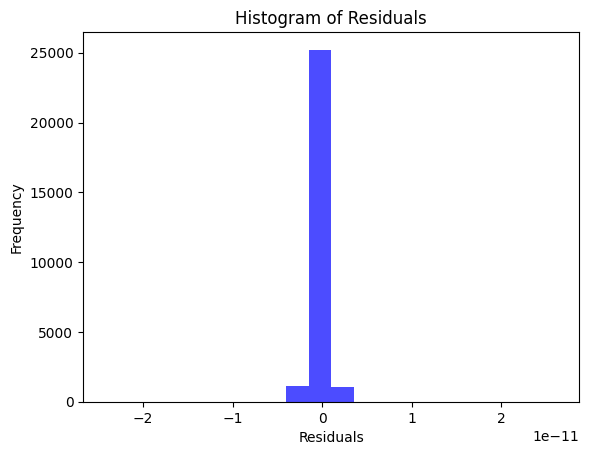

In [27]:
predictions = lin_reg_model.predict(X)
residuals = y - predictions

plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Evaluating using Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

scores = cross_val_score(lin_reg_model, X, y, cv=cv, scoring='neg_mean_squared_error')

mse_scores = -scores  # Convert back to positive values
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation of MSE: {mse_scores.std()}')

Mean MSE: 5.558788002395656e-23
Standard Deviation of MSE: 9.287506214653222e-23


# IMPROVED MODEL

In [29]:
df4 = pd.get_dummies(df3, columns=['BUILDING CLASS CATEGORY'], prefix = ['BUILDING_CLASS'])

In [30]:
df4.shape

(27395, 85)

In [31]:
df4.dtypes

BLOCK                int64
LOT                  int64
ZIP CODE             int64
RESIDENTIAL UNITS     int8
COMMERCIAL UNITS     int64
                     ...  
BUILDING_CLASS_28     bool
BUILDING_CLASS_29     bool
BUILDING_CLASS_30     bool
BUILDING_CLASS_31     bool
BUILDING_CLASS_32     bool
Length: 85, dtype: object

## Model Training & Testing

### Splitting into training & testing data

In [32]:
x = df4.drop(['SALE DATE'], axis = 1)
y = df4['SALE PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [33]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

## Histogram of Improved Model Residual

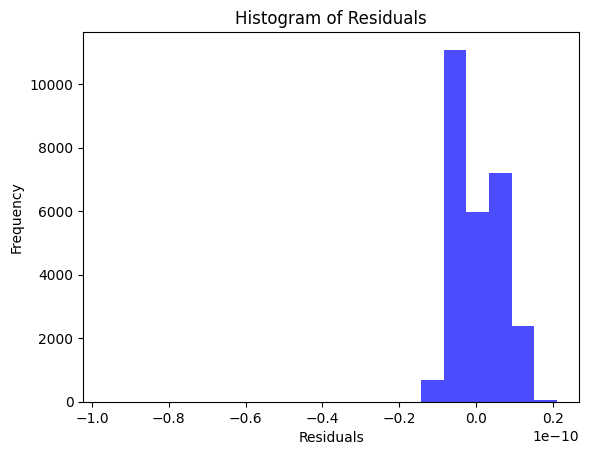

In [34]:
predictions = lin_reg_model.predict(x)
residuals = y - predictions

plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Evaluating using Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

scores = cross_val_score(lin_reg_model, x, y, cv=cv, scoring='neg_mean_squared_error')

mse_scores = -scores  # Convert back to positive values
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation of MSE: {mse_scores.std()}')

Mean MSE: 2.1917563090286624e-23
Standard Deviation of MSE: 7.37515095085767e-24


## Scaling features

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K=5
kmeans = KMeans(n_clusters=K, random_state=0)
clusters = kmeans.fit_predict(X_scaled)


C:\Users\firaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
cluster_sizes = pd.Series(clusters).value_counts().sort_index()

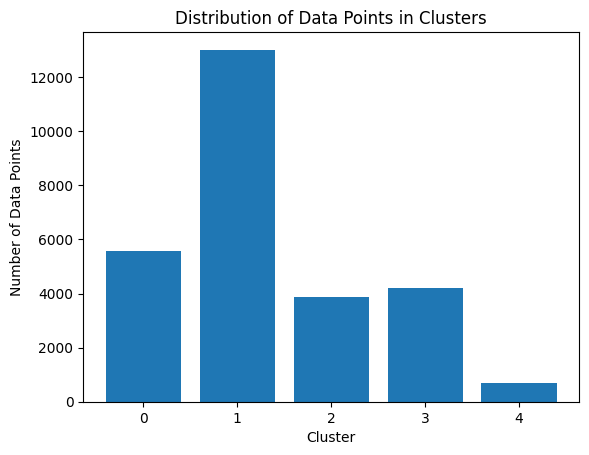

In [38]:
plt.bar(range(K), cluster_sizes, tick_label=range(K))
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points in Clusters')
plt.show()
